<a href="https://colab.research.google.com/github/Ausmints/demo-repo/blob/main/Wine_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from collections import Counter


import statsmodels.api as sm

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
sns.set()
colors = {"blue": "#4C72B0", "orange": "#DD8452", "green": "#55A868", "red": "#C44E52", "grey": "#8C8C8C"}

In [4]:
id = "1ThWwZXTvLLN7WNFGB3SSNSC9jSzw22xq"
downloaded = drive.CreateFile({"id": id})
downloaded.GetContentFile("Filename.csv")
df = pd.read_csv("Filename.csv")

In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df.shape

(1599, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.isnull().sum().sum()

0

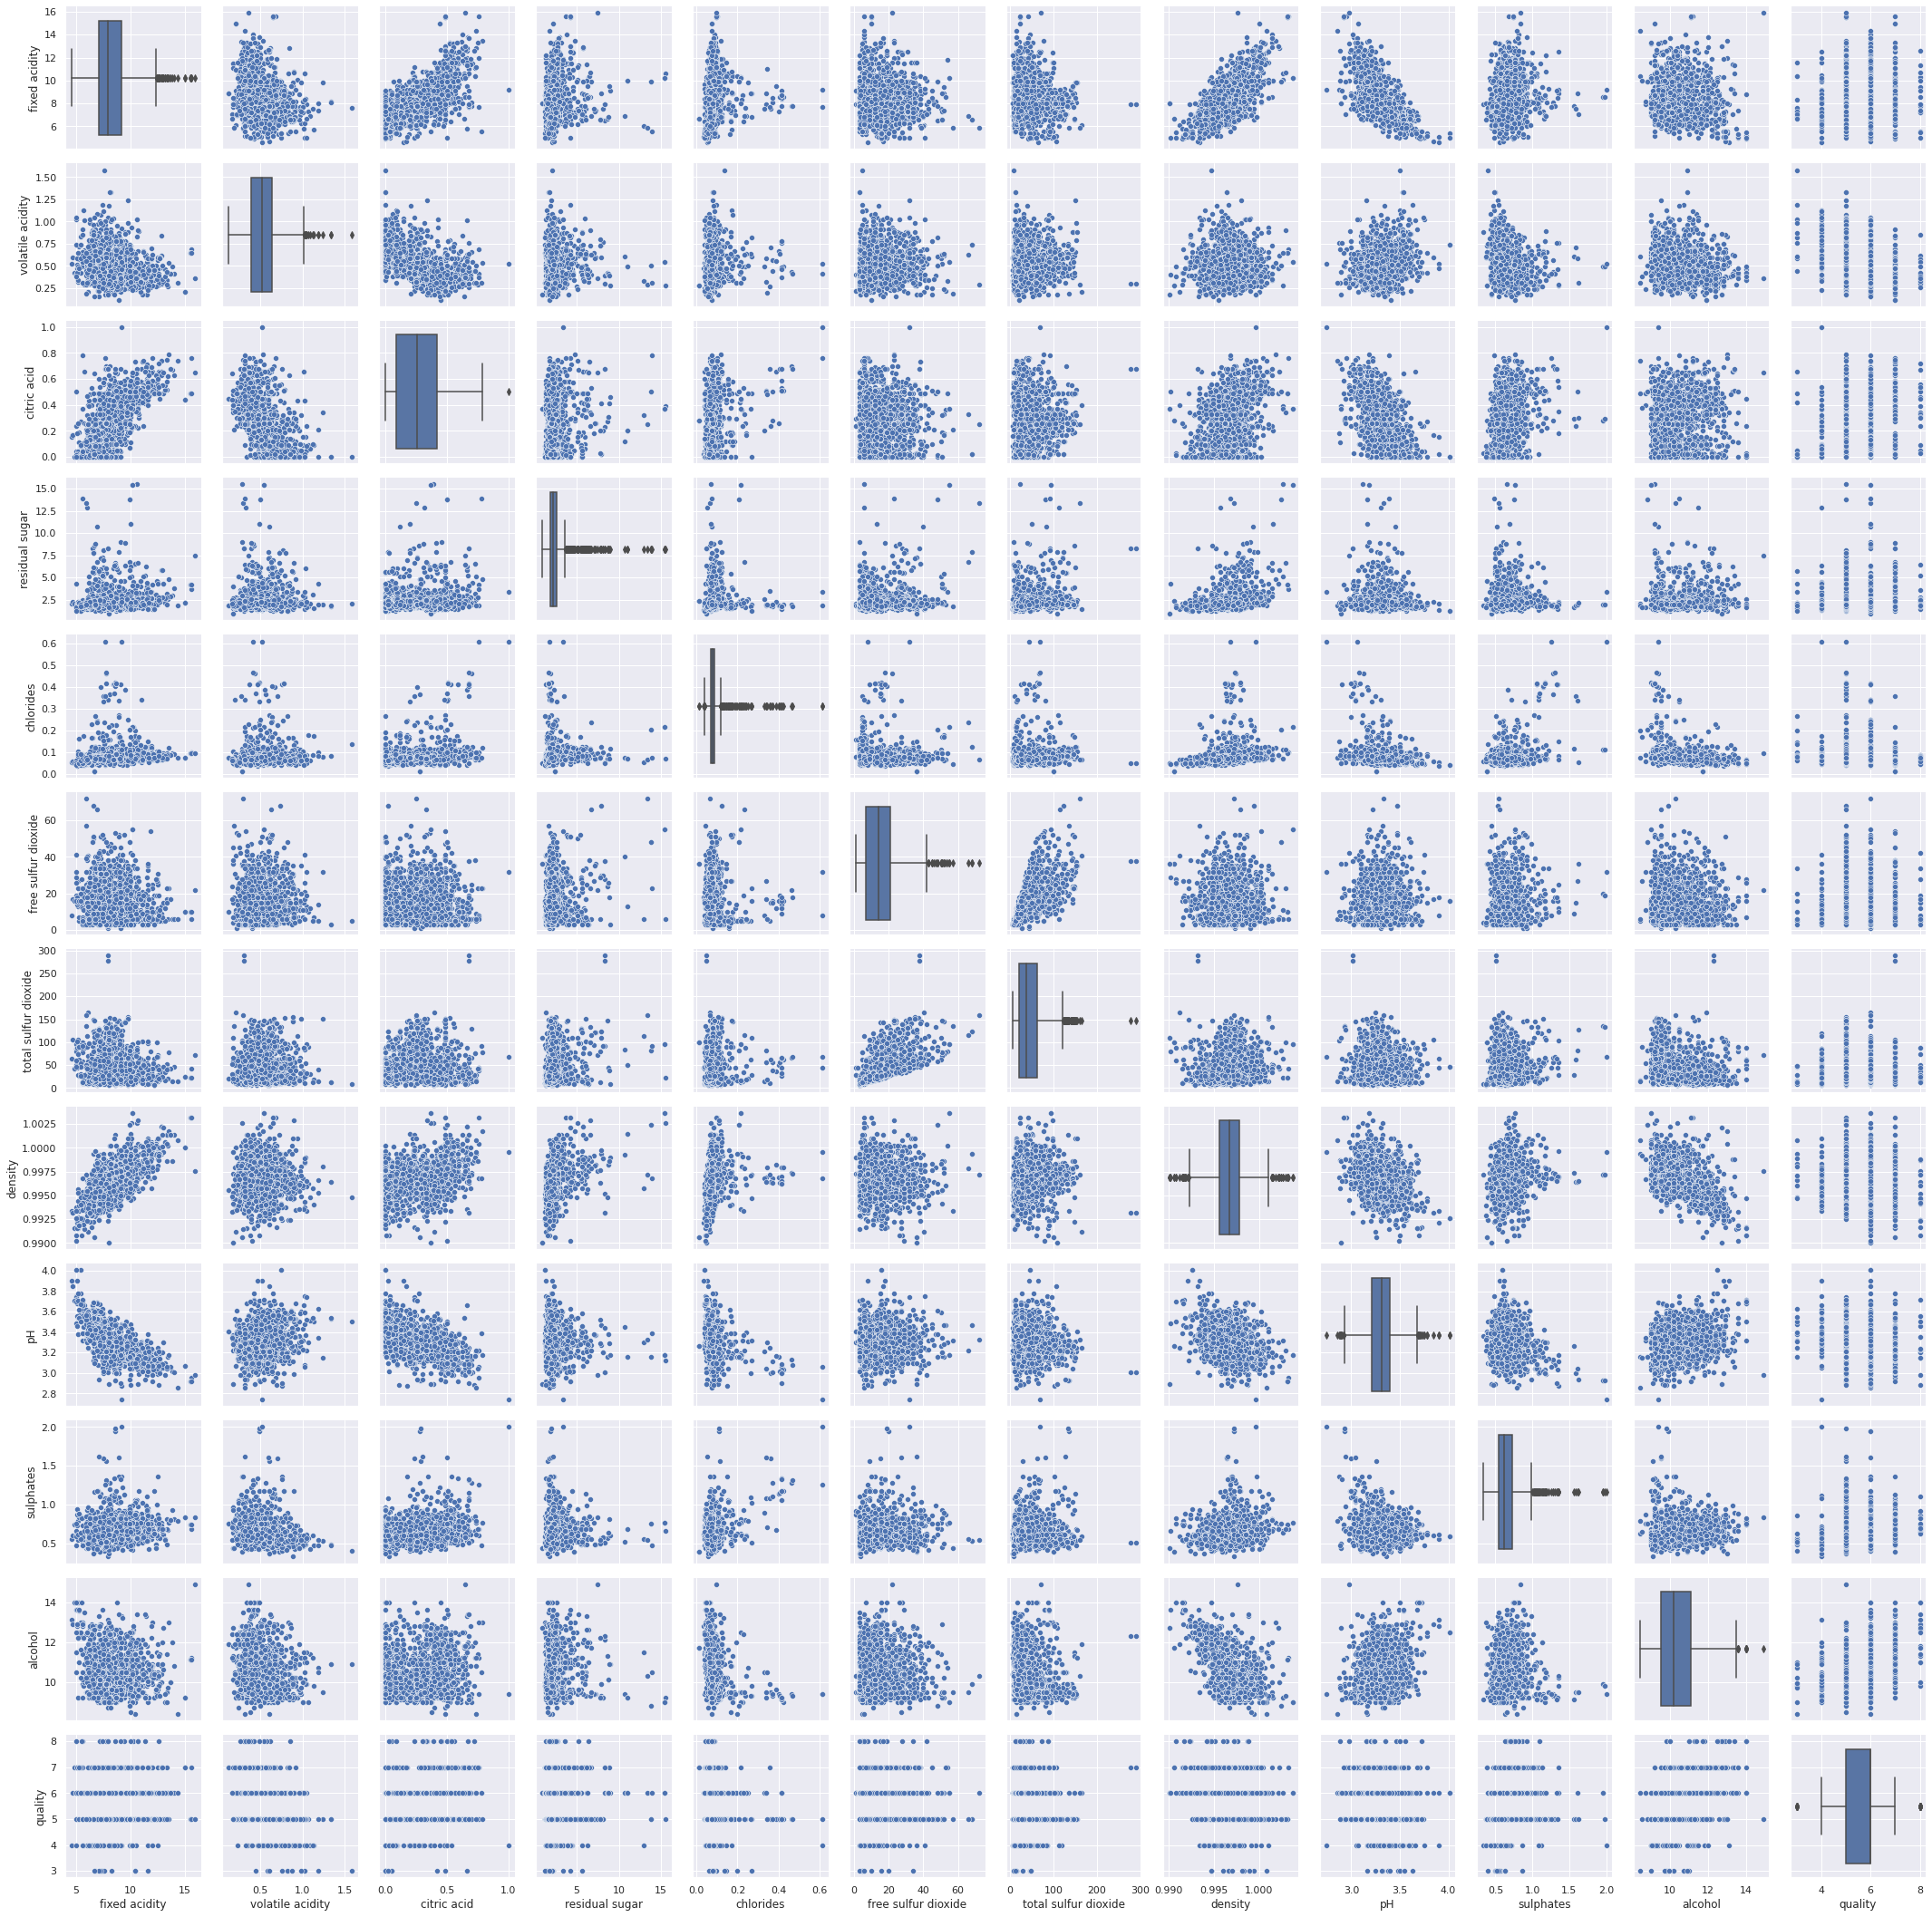

In [10]:
g = sns.PairGrid(df)
g.map_diag(sns.boxplot)
g.map_offdiag(sns.scatterplot)

In [11]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [12]:
scaled_df.describe().loc[["std","mean"]]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205


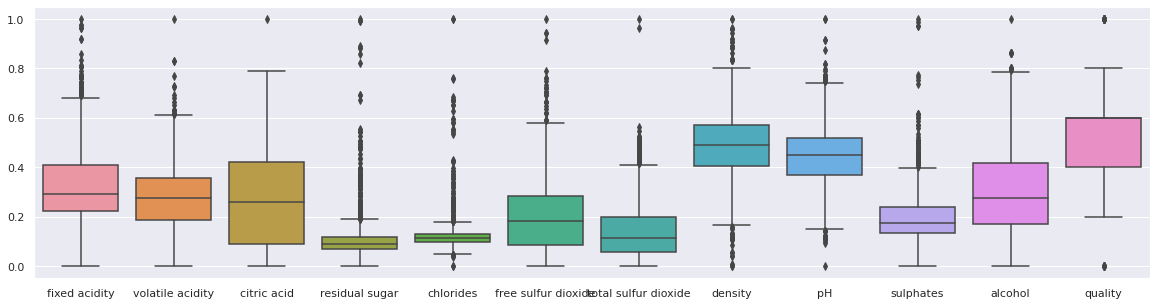

In [13]:
plt.figure(figsize=(20, 5))
ax = sns.boxplot(data = scaled_df)
plt.show()

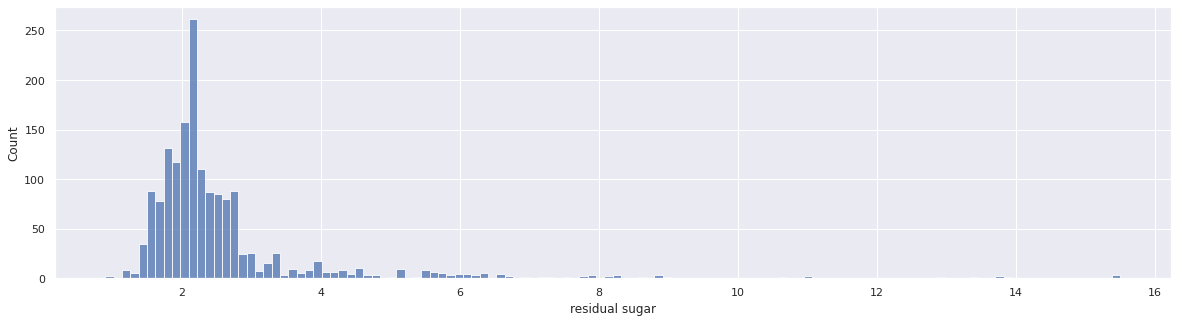

In [14]:
plt.figure(figsize=(20, 5))
ax = sns.histplot(x= df["residual sugar"])
plt.show()

[residual sugar in wines chart](https://media.winefolly.com/carbs-in-wine-from-residual-sugar-winefolly.png)

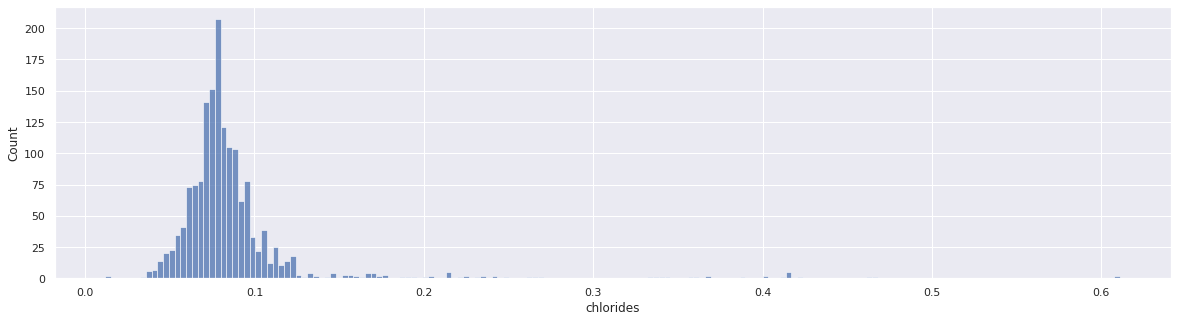

In [15]:
plt.figure(figsize=(20, 5))
ax = sns.histplot(x= df["chlorides"])
plt.show()

[chlorides in wine link](https://www.scielo.br/j/cta/a/HQsrPrPMNZYgRzSKtrjHyHh/?lang=en#)

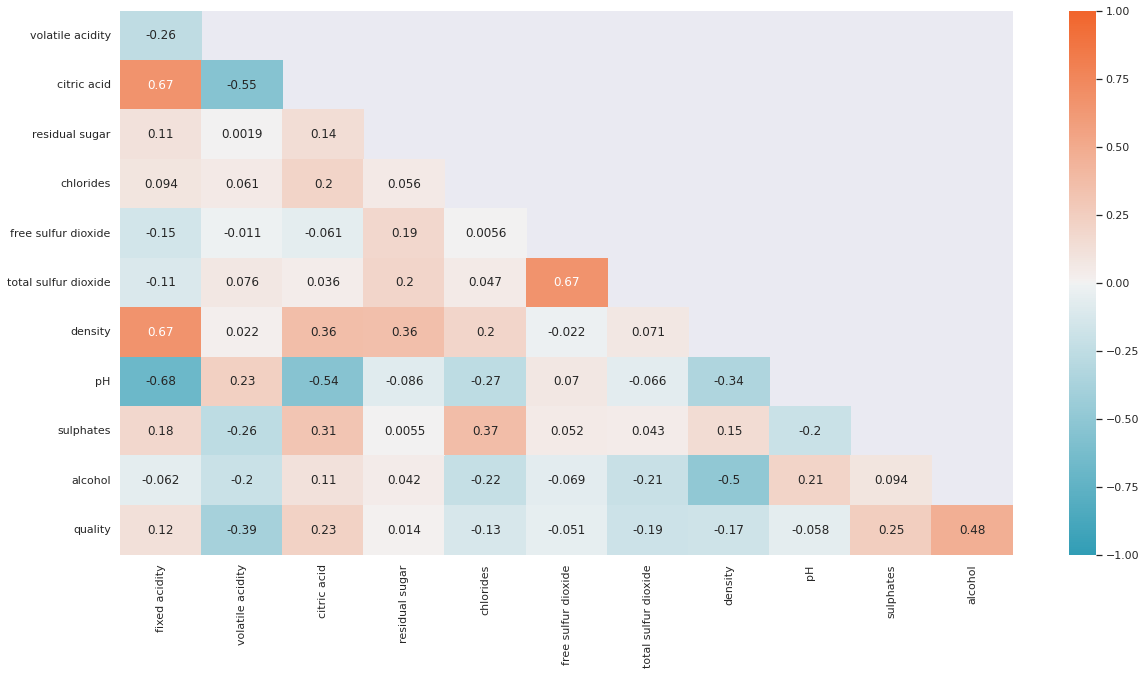

In [16]:
cmap = sns.diverging_palette(217, 22, 90, 60, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
mask = mask[1:, :-1]
corr = df.corr().iloc[1:,:-1].copy()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True, vmin= -1, vmax=1)
plt.show()

In [79]:
from sklearn.linear_model import LinearRegression


predictors = ['alcohol']
outcome = 'quality'

model = LinearRegression()
model.fit(df[predictors], df[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 1.875
Coefficient Exposure: 0.361


In [81]:
fitted =model.predict(df[predictors])
RMSE = np.sqrt(skmetrics.mean_squared_error(df[outcome], fitted))
r2 = skmetrics.r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.3f}')
print(f'r2: {r2:.4f}')

RMSE: 0.710
r2: 0.2267


In [55]:
predictors = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates']
outcome = 'quality'

house_lm = LinearRegression()
house_lm.fit(df[predictors], df[outcome])

LinearRegression()

In [56]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 2.646
Coefficients:
 alcohol: 0.3090781452926269
 volatile acidity: -1.2650584518192962
 citric acid: -0.0791250617373398
 sulphates: 0.695516105665417


In [53]:
from sklearn import metrics as skmetrics

In [71]:
fitted = house_lm.predict(df[predictors])
RMSE = np.sqrt(skmetrics.mean_squared_error(df[outcome], fitted))
r2 = skmetrics.r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.3f}')
print(f'r2: {r2:.4f}')

RMSE: 0.658
r2: 0.3361


In [75]:
outcome = 'quality'

house_lm = LinearRegression()
house_lm.fit(df.loc[:,'fixed acidity' : 'alcohol'], df[outcome])

LinearRegression()

In [76]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(df.loc[:,'fixed acidity' : 'alcohol'].columns, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: 21.965
Coefficients:
 fixed acidity: 0.024990552671673858
 volatile acidity: -1.0835902586934338
 citric acid: -0.1825639484107152
 residual sugar: 0.016331269765475123
 chlorides: -1.8742251580992013
 free sulfur dioxide: 0.00436133330909666
 total sulfur dioxide: -0.003264579703068482
 density: -17.881163832495947
 pH: -0.41365314382175944
 sulphates: 0.9163344127211345
 alcohol: 0.27619769922688747


In [78]:
fitted = house_lm.predict(df.loc[:,'fixed acidity' : 'alcohol'])
RMSE = np.sqrt(skmetrics.mean_squared_error(df[outcome], fitted))
r2 = skmetrics.r2_score(df[outcome], fitted)
print(f'RMSE: {RMSE:.3f}')
print(f'r2: {r2:.4f}')

RMSE: 0.646
r2: 0.3606


In [61]:
df2 = pd.DataFrame()
df2["fitted"] = fitted
df2["old"] = df[outcome]

In [69]:
np.sqrt(skmetrics.mean_squared_error(df[outcome], fitted))

0.6577828138041528

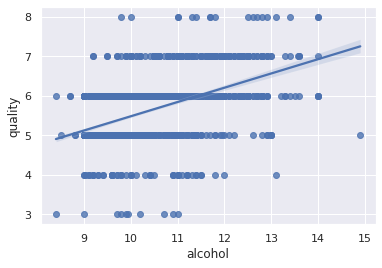

In [18]:
sns.regplot(x="alcohol", y="quality", data=df);

In [46]:
fitted = model.predict([[11.5]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [47]:
fitted

array([6.02465519])

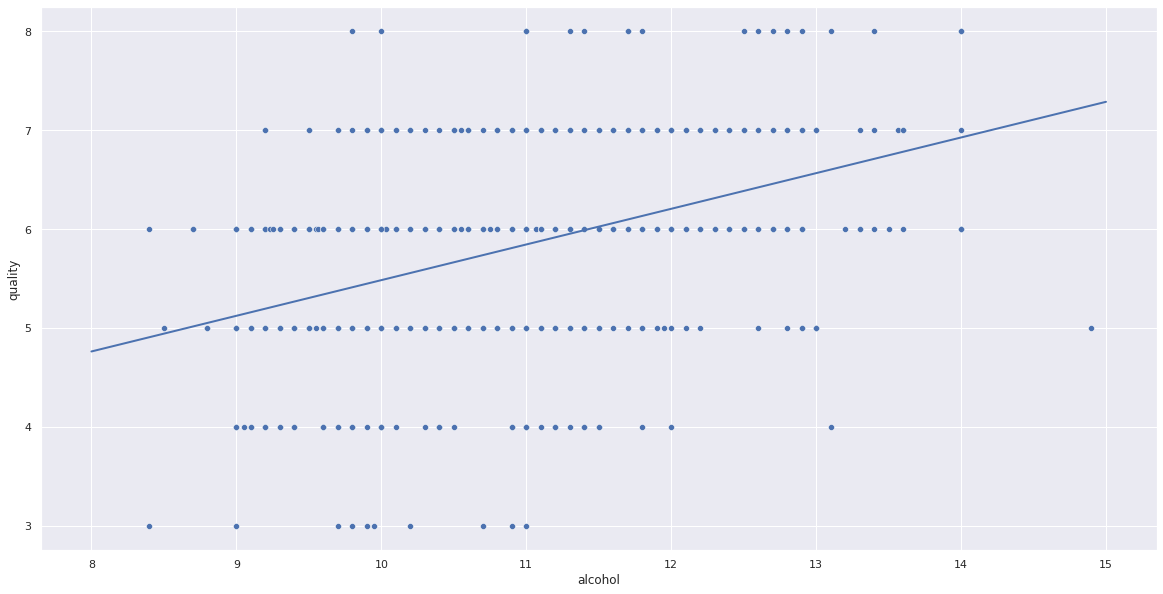

In [43]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="alcohol", y="quality")
plt.plot([0+8, 15], [model.intercept_+(8*model.coef_[0]), model.intercept_+(15*model.coef_[0])], linewidth=2)

plt.show()

In [39]:
predictors = ['fixed acidity']
outcome = 'citric acid'

model = LinearRegression()
model.fit(df[predictors], df[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: -0.354
Coefficient Exposure: 0.075


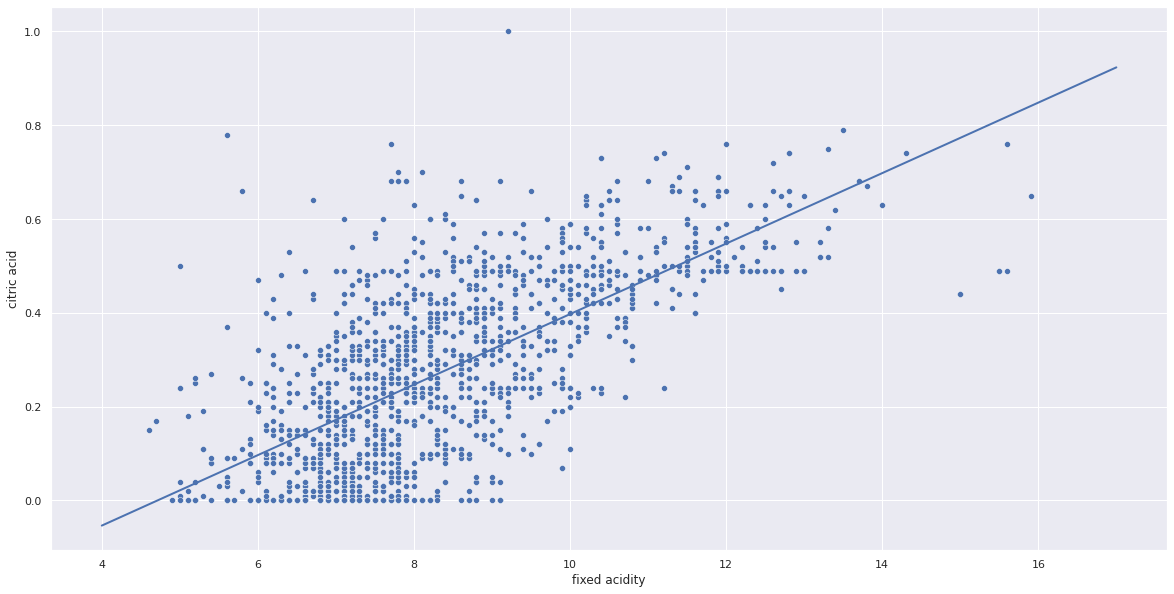

In [41]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="fixed acidity", y="citric acid")
plt.plot([4, 17], [model.intercept_+(4*model.coef_[0]), model.intercept_+(17*model.coef_[0])], linewidth=2)

plt.show()

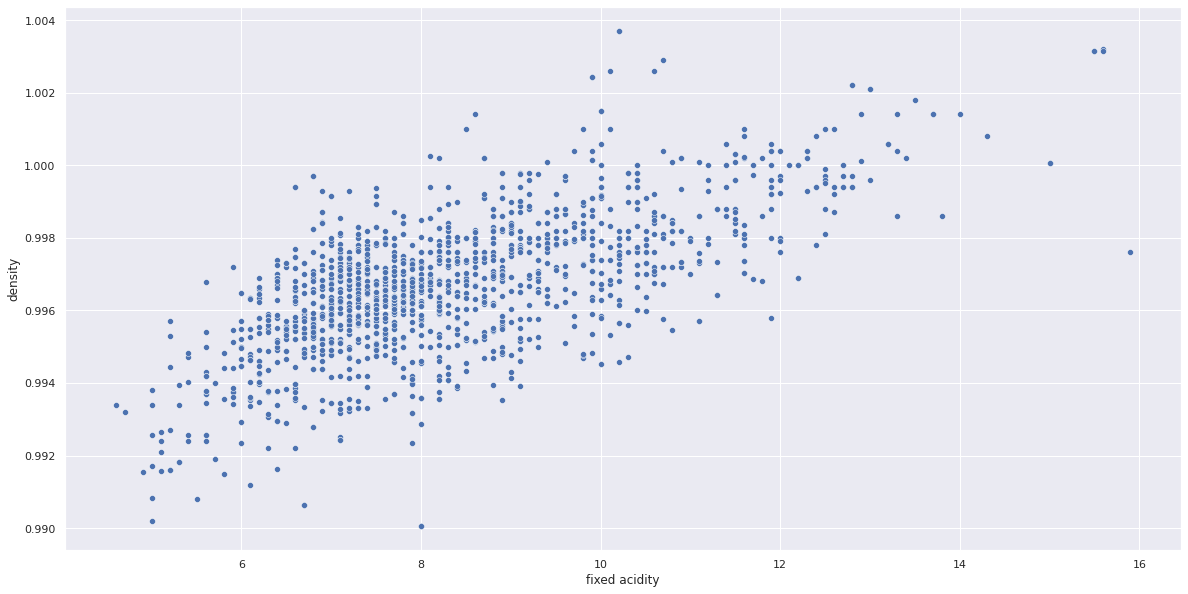

In [20]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="fixed acidity", y="density")
plt.show()

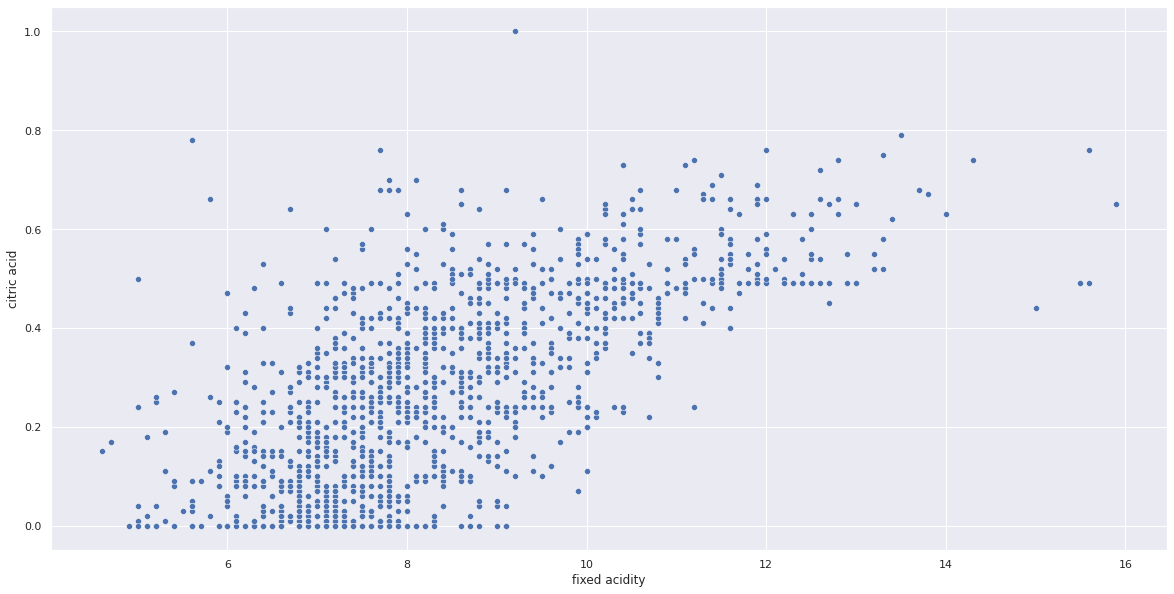

In [21]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="fixed acidity", y="citric acid")
plt.show()

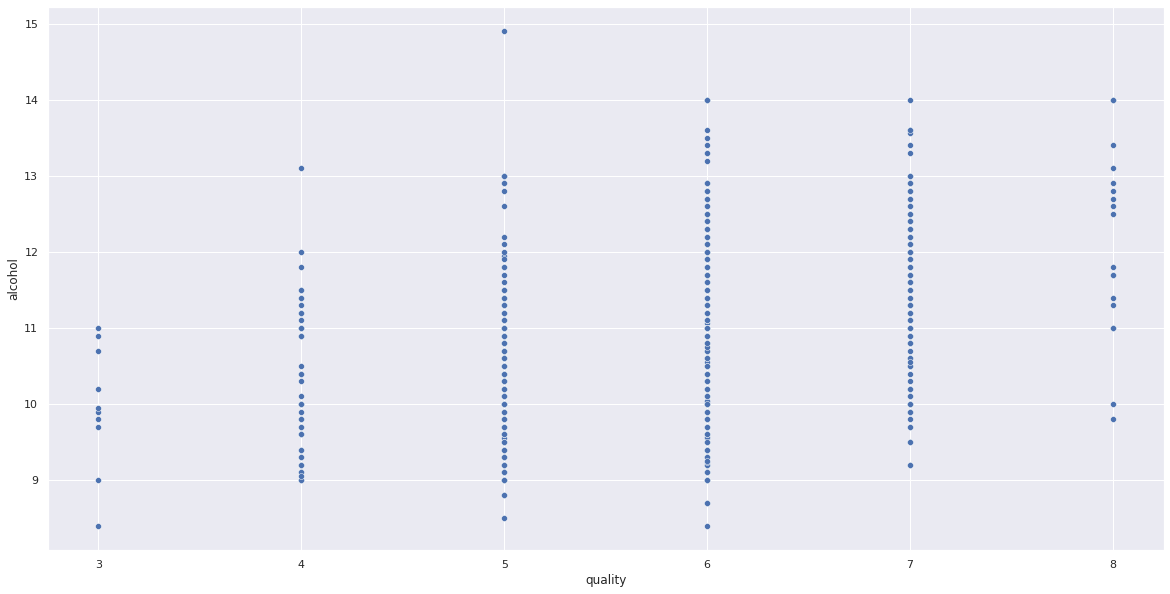

In [22]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, x="quality", y="alcohol")
plt.show()

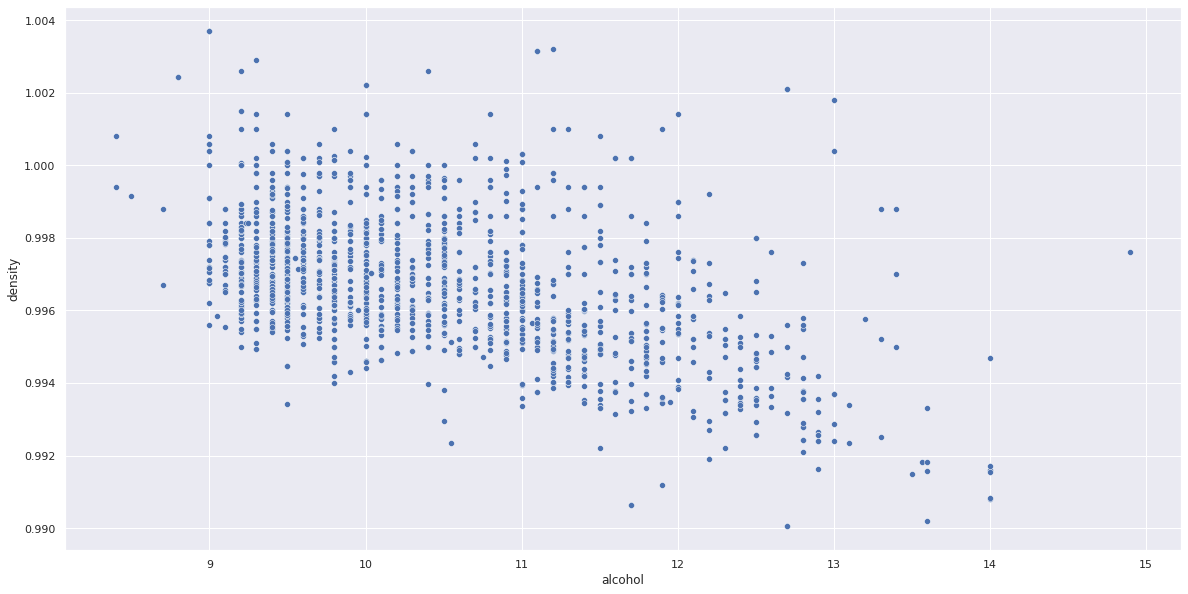

In [23]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=df, y="density", x="alcohol")
plt.show()